## EDA of the clean PERSIANN

In [1]:
# data wrangling
import pandas as pd
import numpy as np

# image processing
from PIL import Image
import matplotlib.pyplot as plt

# geo data processing
from osgeo import gdal
from osgeo import osr

import georasters as gr
import geopandas as gpd

# utils
import glob
import os
from struct import unpack # binary data

/home/adriel-martins/.cache/pypoetry/virtualenvs/wm-tAk-yGEW-py3.8/lib/python3.8/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


<AxesSubplot:>

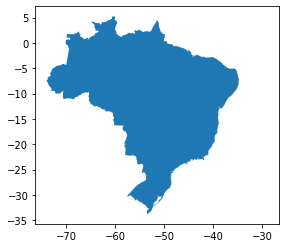

In [2]:
gadm = gpd.read_file(
    '../data/gadm/gadm36_BRA_1.shp'
).dissolve(
    by='NAME_0'
).drop(
    columns=[
        'GID_0', 'GID_1', 'NAME_1',
        'VARNAME_1', 'NL_NAME_1', 'TYPE_1',
        'ENGTYPE_1', 'CC_1', 'HASC_1'
    ]
)
gadm.plot()

In [3]:
data = gr.from_file('../data/PERSIANN_1d20211227.tif')
geodata = data.to_geopandas().rename(
    columns={
        'x':'lon',
        'y':'lat'
    }
).drop(
    columns=['row', 'col']
).set_crs(
    gadm.crs,
    inplace=True, allow_override=True
)

geodata

,value,lon,lat,geometry
0,0.91,-180.00,59.50,"POLYGON ((-180.00000 59.50000, -179.75000 59.5..."
1,0.69,-179.75,59.50,"POLYGON ((-179.75000 59.50000, -179.50000 59.5..."
2,0.35,-179.50,59.50,"POLYGON ((-179.50000 59.50000, -179.25000 59.5..."
3,0.34,-179.25,59.50,"POLYGON ((-179.25000 59.50000, -179.00000 59.5..."
4,0.75,-179.00,59.50,"POLYGON ((-179.00000 59.50000, -178.75000 59.5..."
...,...,...,...,...
685435,0.00,178.75,-59.25,"POLYGON ((178.75000 -59.25000, 179.00000 -59.2..."
685436,0.00,179.00,-59.25,"POLYGON ((179.00000 -59.25000, 179.25000 -59.2..."
685437,0.00,179.25,-59.25,"POLYGON ((179.25000 -59.25000, 179.50000 -59.2..."
685438,0.00,179.50,-59.25,"POLYGON ((179.50000 -59.25000, 179.75000 -59.2..."


In [11]:
lon_array = np.arange(-69, -36, .25).tolist()
lat_array = np.arange(-35, 6, .25).tolist()
target_geodata = geodata.query(
    'lon in @lon_array & lat in @lat_array & value > 0'
)
target_geodata

,value,lon,lat,geometry
310086,0.57,-58.50,5.75,"POLYGON ((-58.50000 5.75000, -58.25000 5.75000..."
310087,3.20,-58.25,5.75,"POLYGON ((-58.25000 5.75000, -58.00000 5.75000..."
310088,1.75,-58.00,5.75,"POLYGON ((-58.00000 5.75000, -57.75000 5.75000..."
310089,1.01,-57.75,5.75,"POLYGON ((-57.75000 5.75000, -57.50000 5.75000..."
310093,0.61,-56.75,5.75,"POLYGON ((-56.75000 5.75000, -56.50000 5.75000..."
...,...,...,...,...
544871,11.56,-42.25,-35.00,"POLYGON ((-42.25000 -35.00000, -42.00000 -35.0..."
544872,7.24,-42.00,-35.00,"POLYGON ((-42.00000 -35.00000, -41.75000 -35.0..."
544873,2.33,-41.75,-35.00,"POLYGON ((-41.75000 -35.00000, -41.50000 -35.0..."
544874,0.34,-41.50,-35.00,"POLYGON ((-41.50000 -35.00000, -41.25000 -35.0..."


In [16]:
geodata.mean()

value    1.757123
lon     -0.125000
lat      0.125000
dtype: float64

In [8]:
target_geodata.mean()

value     9.641722
lon     -52.274581
lat     -11.254978
dtype: float64

<AxesSubplot:>

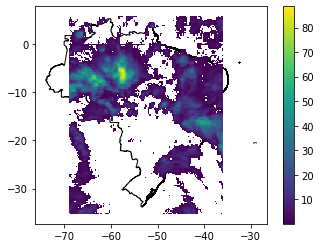

In [17]:
ax = gadm.plot(color='white', edgecolor='black')

target_geodata.plot(ax=ax, column='value', legend=True, markersize=3)